# **Oversampling Data**

## **Load data iris**

In [20]:
pip install pymysql


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install sqlalchemy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install psycopg2-binary



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine

load_dotenv()

# PostgreSQL
pg_host = os.getenv("PG_HOST")
pg_port = os.getenv("PG_PORT")
pg_db = os.getenv("PG_DB")
pg_user = os.getenv("PG_USER")
pg_password = os.getenv("PG_PASSWORD")

engine_pg = create_engine(
    f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_db}"
)

# MySQL
mysql_host = os.getenv("MYSQL_HOST")
mysql_port = os.getenv("MYSQL_PORT")
mysql_db = os.getenv("MYSQL_DB")
mysql_user = os.getenv("MYSQL_USER")
mysql_password = os.getenv("MYSQL_PASSWORD")

engine_mysql = create_engine(
    f"mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_db}"
)

# ======================
# Ambil data
# ======================

# Ambil data dari tabel iris_mysql (MySQL)
df_mysql = pd.read_sql("SELECT * FROM iris_mysql;", engine_mysql)
print(df_mysql.head())

# Ambil data dari tabel iris (PostgreSQL)
df_postgre = pd.read_sql("SELECT * FROM iris;", engine_pg)
print(df_postgre.head())


   id        class  petal_length  petal_width  sepal_length  sepal_width
0   2  Iris-setosa           1.4          0.2           4.9          3.0
1   3  Iris-setosa           1.3          0.2           4.7          3.2
2   4  Iris-setosa           1.5          0.2           4.6          3.1
3   5  Iris-setosa           1.4          0.2           5.0          3.6
4   6  Iris-setosa           1.7          0.4           5.4          3.9
   id        class  petal_length  petal_width  sepal_length  sepal_width
0   2  Iris-setosa           1.4          0.2           4.9          3.0
1   3  Iris-setosa           1.3          0.2           4.7          3.2
2   4  Iris-setosa           1.5          0.2           4.6          3.1
3   5  Iris-setosa           1.4          0.2           5.0          3.6
4   6  Iris-setosa           1.7          0.4           5.4          3.9


In [25]:
query_mysql = "SELECT id, class, petal_length, petal_width FROM iris_mysql;"
df_mysql = pd.read_sql(query_mysql, engine_mysql)
print("Data dari MySQL:")
print(df_mysql.head())

query_pg = "SELECT id, class, sepal_length, sepal_width FROM iris;"
df_postgre = pd.read_sql(query_pg, engine_pg)
print("\nData dari PostgreSQL:")
print(df_postgre.head())

Data dari MySQL:
   id        class  petal_length  petal_width
0   2  Iris-setosa           1.4          0.2
1   3  Iris-setosa           1.3          0.2
2   4  Iris-setosa           1.5          0.2
3   5  Iris-setosa           1.4          0.2
4   6  Iris-setosa           1.7          0.4

Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   2  Iris-setosa           4.9          3.0
1   3  Iris-setosa           4.7          3.2
2   4  Iris-setosa           4.6          3.1
3   5  Iris-setosa           5.0          3.6
4   6  Iris-setosa           5.4          3.9


In [26]:
merge_df = pd.merge(df_mysql,df_postgre,on=["id","class"],how="outer")

print("Hasil merge :")
print(merge_df.head())

Hasil merge :
   id        class  petal_length  petal_width  sepal_length  sepal_width
0   2  Iris-setosa           1.4          0.2           4.9          3.0
1   3  Iris-setosa           1.3          0.2           4.7          3.2
2   4  Iris-setosa           1.5          0.2           4.6          3.1
3   5  Iris-setosa           1.4          0.2           5.0          3.6
4   6  Iris-setosa           1.7          0.4           5.4          3.9


## **Hapus 15 data awal dari class iris-setosa**

In [27]:
# Ambil semua iris-setosa
setosa = merge_df[merge_df["class"] == "Iris-setosa"]

# Sisakan hanya 15 data pertama
setosa_keep = setosa.head(15)

# Ambil data selain iris-setosa
non_setosa = merge_df[merge_df["class"] != "Iris-setosa"]

# Gabungkan kembali
merge_df = pd.concat([non_setosa, setosa_keep], ignore_index=True)

print(merge_df["class"].value_counts())

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        15
Name: count, dtype: int64


## **Menampilkan data yang sudah dihapus**

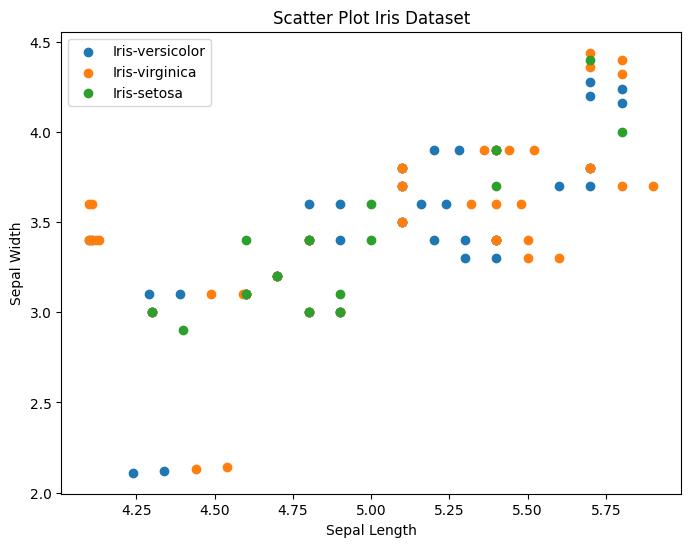

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for species in merge_df["class"].unique():
    subset = merge_df[merge_df["class"] == species]
    plt.scatter(subset["sepal_length"], subset["sepal_width"], label=species)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot Iris Dataset")
plt.legend()
plt.show()

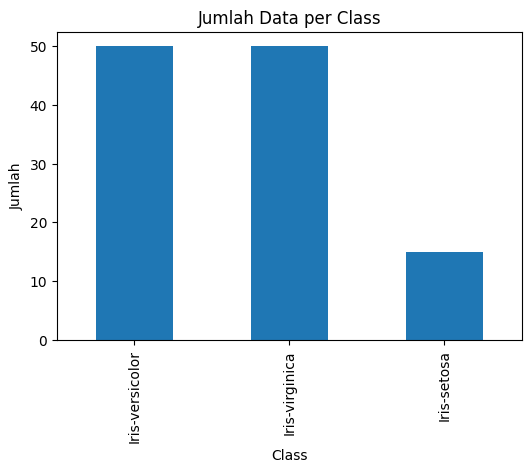

In [29]:
merge_df["class"].value_counts().plot(kind="bar", figsize=(6,4))

plt.title("Jumlah Data per Class")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

## **Meampilkan data yang sudah seimbang dengan SMOTE**

Distribusi sebelum balancing:
class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        15
Name: count, dtype: int64

Distribusi setelah balancing:
class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: count, dtype: int64


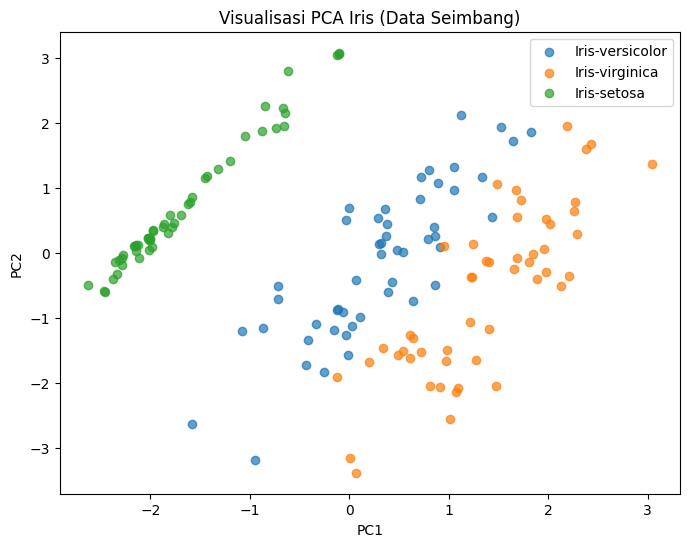

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Fitur numerik
X = merge_df[["petal_length", "petal_width", "sepal_length", "sepal_width"]]
y = merge_df["class"]

# Cek distribusi awal
print("Distribusi sebelum balancing:")
print(y.value_counts())

# Oversampling pakai SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Cek distribusi setelah balancing
print("\nDistribusi setelah balancing:")
print(pd.Series(y_res).value_counts())

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame hasil PCA
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["class"] = y_res

# Visualisasi PCA setelah balancing
plt.figure(figsize=(8,6))
for cls in pca_df["class"].unique():
    subset = pca_df[pca_df["class"] == cls]
    plt.scatter(subset["PC1"], subset["PC2"], label=cls, alpha=0.7)

plt.title("Visualisasi PCA Iris (Data Seimbang)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


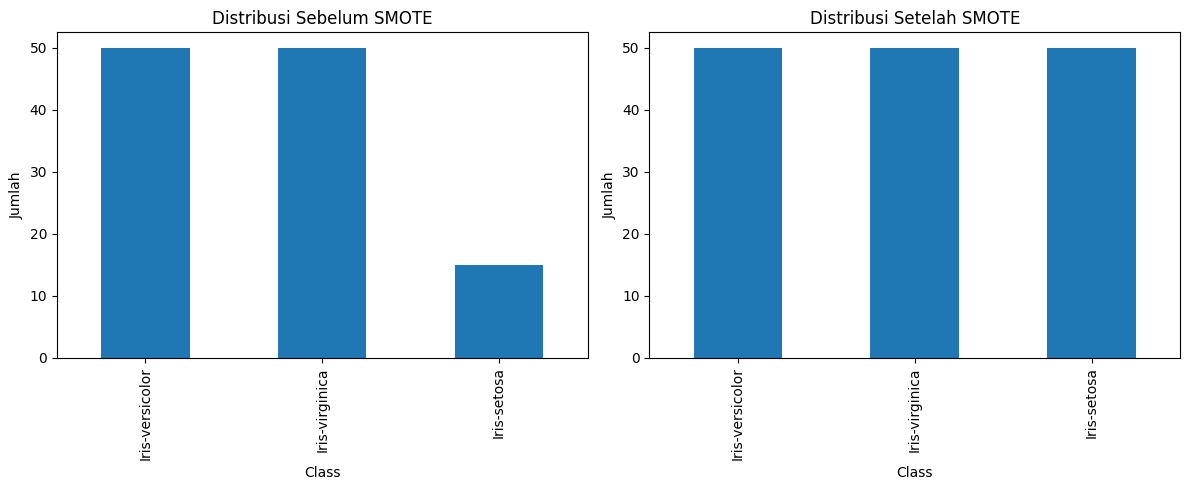

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Sebelum SMOTE
y.value_counts().plot(kind="bar", ax=axes[0], title="Distribusi Sebelum SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Jumlah")

# Setelah SMOTE
pd.Series(y_res).value_counts().plot(kind="bar", ax=axes[1], title="Distribusi Setelah SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()